In [1]:
# pip install deepxde

In [1]:
# Load libraries
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
# import math as m

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


ModuleNotFoundError: No module named 'tensorflow_probability'

In [3]:
# Define Global Parameters
g0    = 9.8                       # gravity
c_d   = .6                        # cd of tennis ball
rho   = 1.                        # density
area  = 3.25*10**-3               # cross sectional area of tennis ball in m^2
mass  = 58 *10**-3                # mass of tennis ball in kg
gamma = .5*(1/mass)*rho*area*c_d  # drag coefficient

Compiling model...
Building feed-forward neural network...
'build' took 0.140565 s

'compile' took 0.617740 s

Training model...

Step      Train loss              Test loss               Test metric
0         [9.93e+01, 0.00e+00]    [9.93e+01, 0.00e+00]    []  
1000      [8.63e-03, 3.55e-06]    [7.41e-03, 3.55e-06]    []  
2000      [7.83e-05, 7.57e-09]    [5.76e-05, 7.57e-09]    []  
3000      [1.54e-05, 8.56e-10]    [1.25e-05, 8.56e-10]    []  
4000      [1.28e-05, 6.06e-10]    [1.04e-05, 6.06e-10]    []  
5000      [1.00e-05, 3.01e-10]    [8.13e-06, 3.01e-10]    []  
6000      [7.99e-06, 3.34e-10]    [6.48e-06, 3.34e-10]    []  

Best model at step 6000:
  train loss: 7.99e-06
  test loss: 6.48e-06
  test metric: []

'train' took 13.379738 s



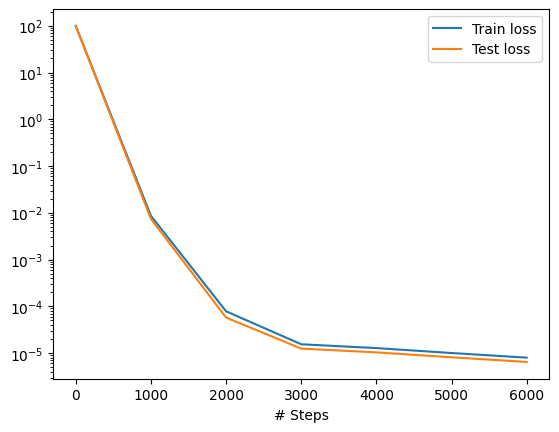

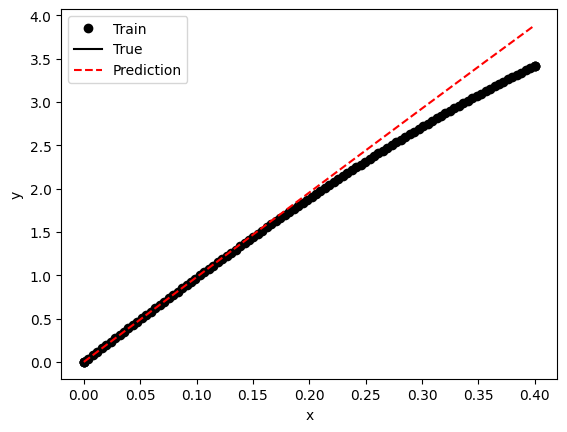

In [4]:
#
g = tf.constant(g0)
c = tf.constant(gamma)

def ode_system(t, u):
    du_t = dde.grad.jacobian(u, t)
    # du_tt = dde.grad.hessian(u,t)
    return du_t - g + c*u**2

def boundary(x, on_boundary):
    return on_boundary

def func(t):
  return 0

geom = dde.geometry.TimeDomain(0, 0.4)

ic = dde.IC(geom, func, boundary)

# Reference solution to compute the error
# def true_solution(t):
#   return 3.45026 * np.log(np.cosh(1.68534 * t))
def true_solution(t):
  return 5.81485*np.tanh(1.68534*t)

data = dde.data.PDE(geom,
                    ode_system,
                    ic,
                    num_domain = 100,
                    num_boundary = 5,
                    train_distribution = "uniform",
                    solution = true_solution,
                    num_test = 500)

layer_size = [1] + [50]*3 + [1]
activation = "tanh"
initializer = "Glorot uniform"

NN = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, NN)
model.compile("adam", lr = 0.001)

losshistory, train_state = model.train(epochs = 6000)
dde.saveplot(losshistory, train_state, issave = False, isplot = True)